In [1]:
#Step 0: Restarting Session-----------------------------------------------------------------------------------------------

try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [2]:
#Step 1: Import all relevant libraries for timeseries forecasting--------------------------------------------------------

#Data Preprocessing:


import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
%matplotlib inline    
from matplotlib import dates
import warnings
warnings.simplefilter("ignore")
import easygui as es

In [3]:
#Data Evaluation:

from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
import matplotlib.ticker as ticker


In [4]:
#Model Selection:
    
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AR,ARResults
from pmdarima import auto_arima
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults


In [5]:
#Model Evaluation & Forecasting:

from statsmodels.tools.eval_measures import mse, rmse, meanabs
from sklearn.metrics import mean_squared_error

In [6]:
#Step 2:  Load input dataset ------------------------------------------------------------------------------------------


#Step 2.1:  Load the input dataset

os.chdir(r"C:\Users\srees\Desktop\Blog Projects\1. Timeseries Forecasting\2. ARIMA\Input")

input_dataframe = pd.read_excel("online_retail.xlsx",parse_dates = True)

print(list(input_dataframe.columns))

['Month', 'Sales']


In [7]:
#Step 3: Inspect the input dataset------------------------------------------------------------------------------------------


#Step 3.1. Evaluate the dataset

input_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   325 non-null    datetime64[ns]
 1   Sales   325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [8]:
input_dataframe.describe()

,Sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [9]:
input_dataframe.head(10)

,Month,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
5,1992-06-01,4529
6,1992-07-01,4466
7,1992-08-01,4137
8,1992-09-01,4126
9,1992-10-01,4259


In [10]:
input_dataframe.tail(10)

,Month,Sales
315,2018-04-01,11919
316,2018-05-01,14138
317,2018-06-01,14583
318,2018-07-01,12640
319,2018-08-01,14257
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [11]:
#Step 3.2: Data Wrangling

#Converting date object to datetime :
    
input_dataframe["Month"]  =  pd.to_datetime(input_dataframe["Month"], format='%Y-%m-%d')


In [12]:
#Dropping NA's:

input_dataframe = input_dataframe.dropna()


In [13]:
#Step 3.3: Set the Datetime field as the index field

input_dataframe = input_dataframe.set_index("Month")



In [14]:
#Step 4: Resampling: 

#Step 4.1: Depending on the nature of the dataset, set the datetime index frequency
 
input_dataframe.index.freq = 'MS'

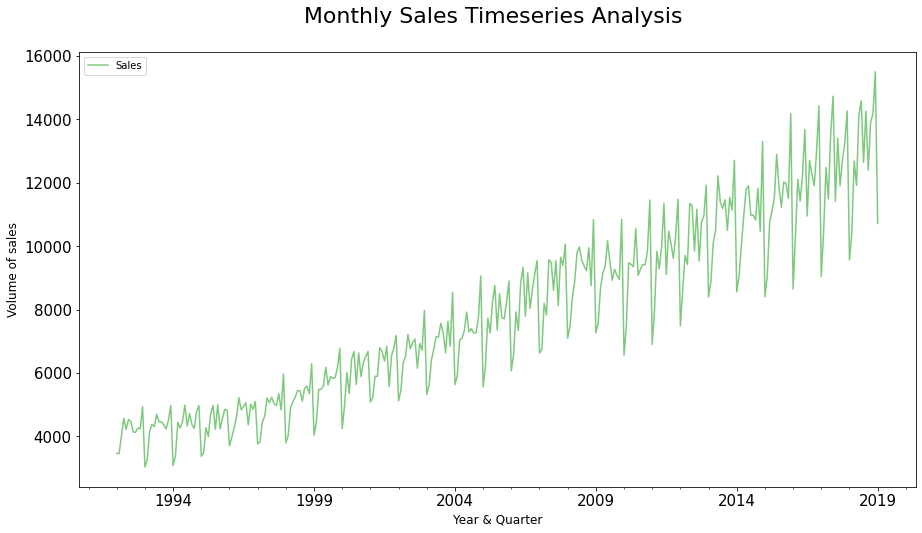

In [15]:
# Step 5: Plot the Source Data ------------------------------------------------------------------


#Plot the Graph:

ax =  input_dataframe['Sales'].plot.line(title = 'Monthly Sales Timeseries Analysis'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)

#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Quarter',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Monthly Sales Timeseries Analysis \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)

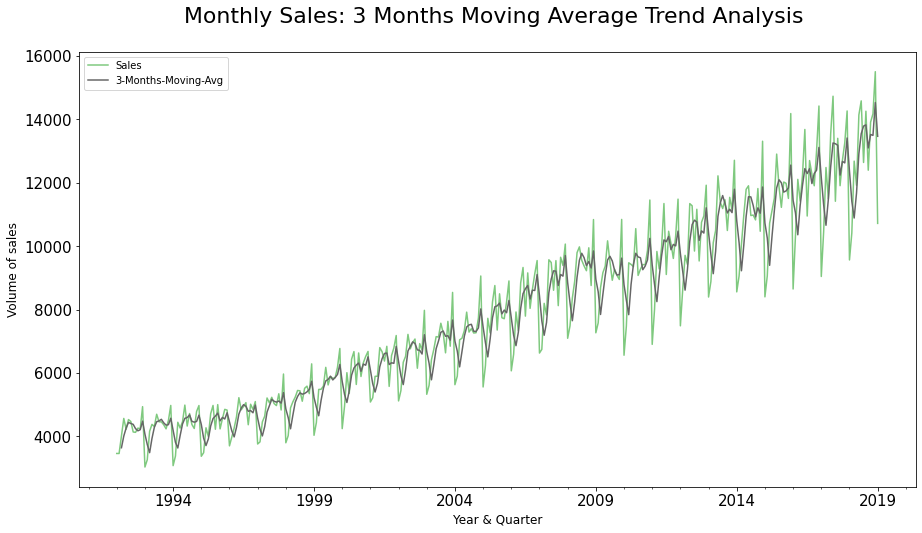

In [16]:
#Step 6.1: Simple Moving Average Trend Analysis:-------------------------------------------------

input_dataframe["3-Months-Moving-Avg"] = input_dataframe ["Sales"].rolling(window=3).mean()

#Plot the Graph:

ax =  input_dataframe[['Sales', '3-Months-Moving-Avg']].plot.line(title = '3 Months Moving Average Trend Analysis'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)

#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Quarter',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Monthly Sales: 3 Months Moving Average Trend Analysis \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)


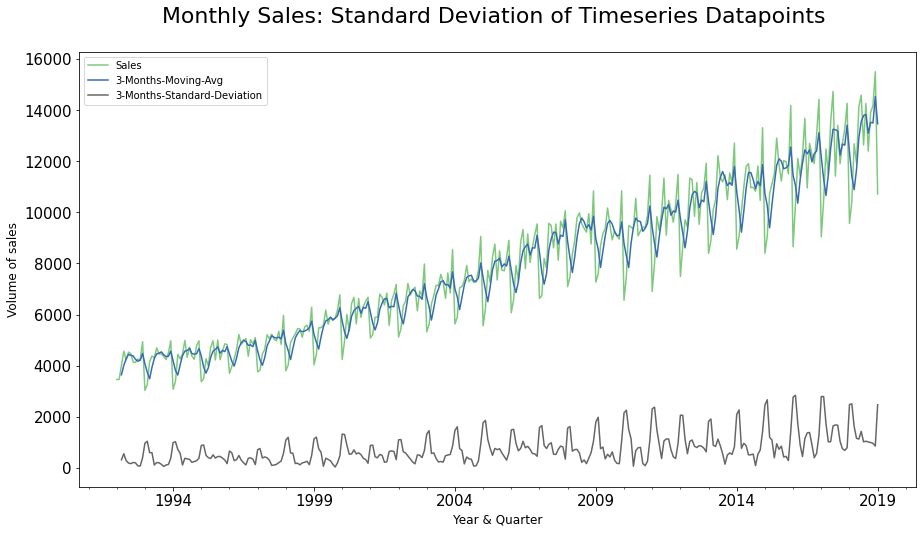

In [17]:
#Step 6.2: Standard Deviation of Timeseries Datapoints:

input_dataframe ['3-Months-Moving-Avg'] = input_dataframe['Sales'].rolling(window=3).mean()
input_dataframe['3-Months-Standard-Deviation'] = input_dataframe['Sales'].rolling(window=3).std()

#Plot the Graph:

ax =  input_dataframe [['Sales', '3-Months-Moving-Avg', '3-Months-Standard-Deviation']].plot.line(title = 'Standard Deviation of Timeseries Datapoints'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)

#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Quarter',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Monthly Sales: Standard Deviation of Timeseries Datapoints \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)


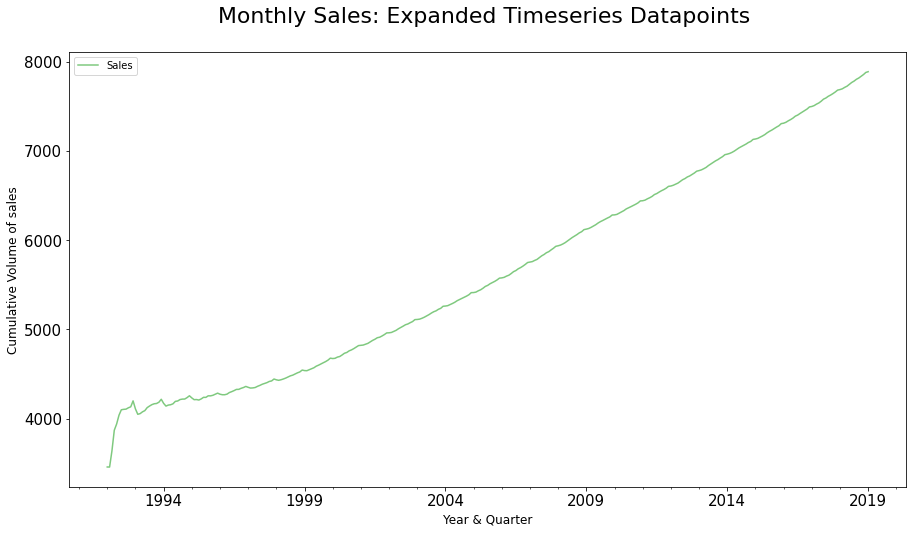

In [18]:
# Step 6.3: Expanding Time Series Datapoints:

#Plot the Graph:

ax =  input_dataframe['Sales'].expanding().mean().plot.line(title = 'Expandind Timeseries Datapoints'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)

#Configure x and y labels:

plt.ylabel('Cumulative Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Quarter',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Monthly Sales: Expanded Timeseries Datapoints \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)

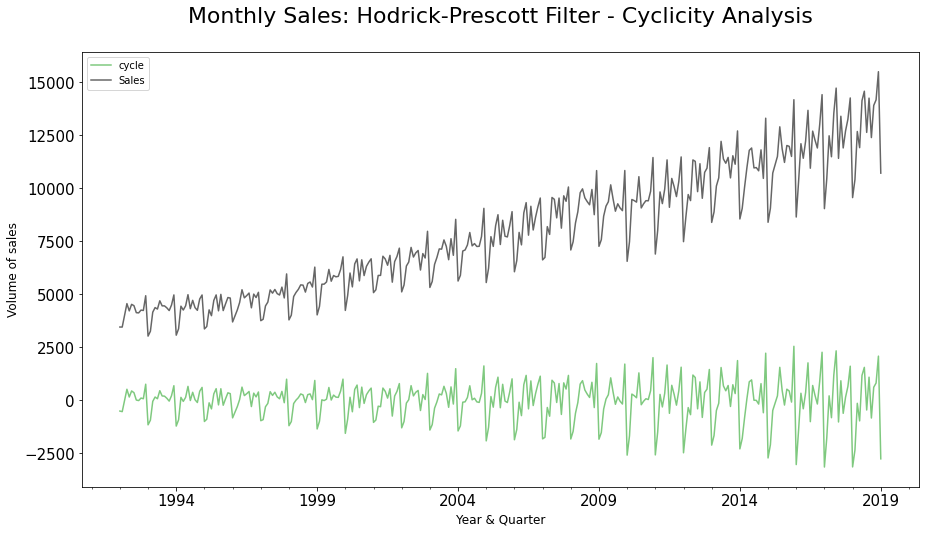

In [19]:
#Step 7: Error, Trend and Seasonality Check---------------------------------------------------------

#Step 7.1: Hodrick-Prescott Filter:

#cyclicity
sales_cycle, sales_trend = hpfilter(input_dataframe["Sales"], lamb = 1600)
input_dataframe["cycle"] = sales_cycle


#Plot the Graph:

ax =  input_dataframe[["cycle", "Sales"]].plot.line(title = 'Hodrick-Prescott Filter - Cyclicity'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)

#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Quarter',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title(' Monthly Sales: Hodrick-Prescott Filter - Cyclicity Analysis \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)





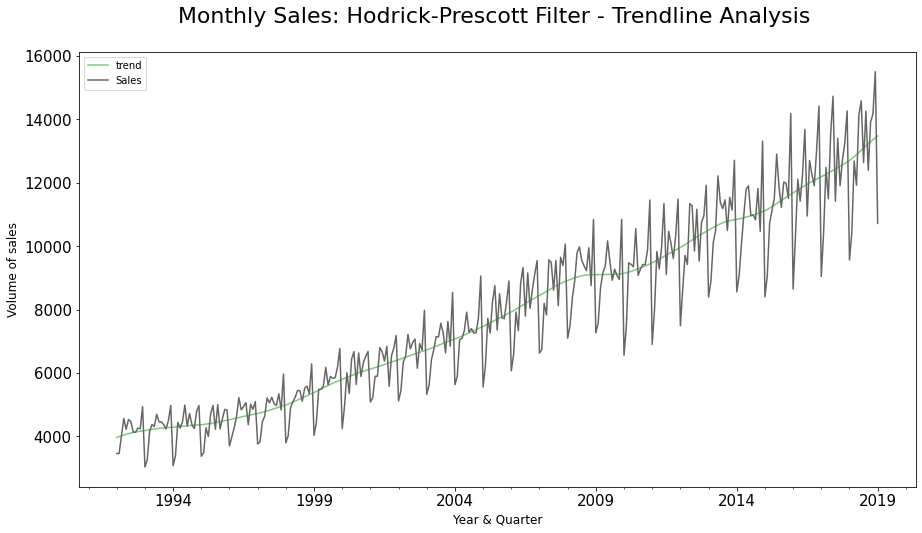

In [20]:
#Trendline

input_dataframe ["trend"] = sales_trend

#Plot the Graph:

ax =  input_dataframe[["trend", "Sales"]].plot.line(title = 'Hodrick-Prescott Filter - Trendline'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)

#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Quarter',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Monthly Sales: Hodrick-Prescott Filter - Trendline Analysis \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)


 

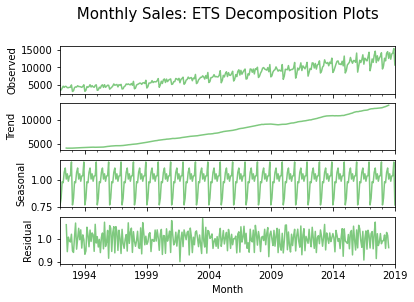

In [21]:
#Step 7.2 : ETS decomposition:

result = seasonal_decompose(input_dataframe["Sales"], model = "multiplicative")

fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax=axes[0], legend=False
                     #, color='r'
                    ,colormap = 'Accent')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False
                  #, color='g'
                 ,colormap = 'Accent')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False
                     #, color='g'
                 ,colormap = 'Accent')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False
                  #, color='k'   
                 ,colormap = 'Accent')
axes[3].set_ylabel('Residual')



plt.title(""" Monthly Sales: ETS Decomposition Plots 









\n""",horizontalalignment="center", fontstyle = "normal", fontsize = "15", fontfamily = "sans-serif")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)




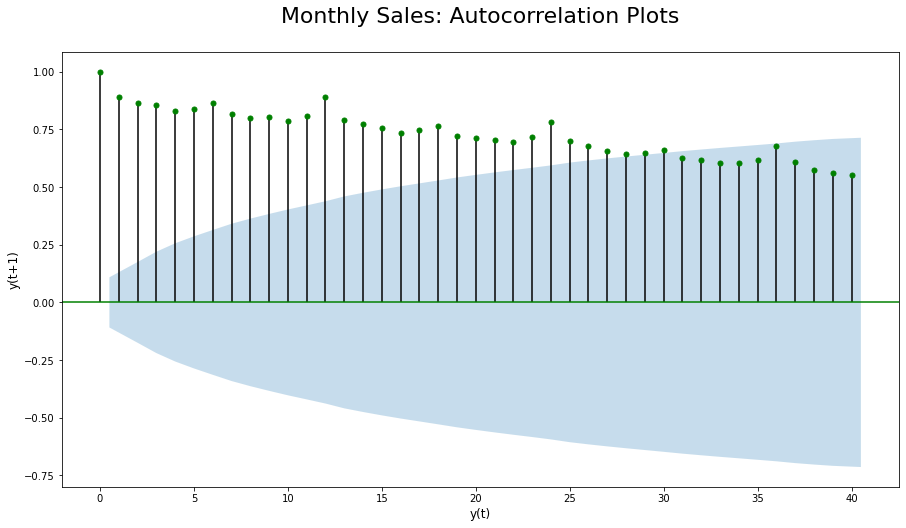

In [22]:
#Step 7.3 : Auto Correlation (ACF) Plots (for seasonality check):

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

acf(input_dataframe["Sales"])
lags = 40
plot_acf(input_dataframe["Sales"], lags = lags, color = 'g', ax = ax);

#plt.figure(figsize=(15,8)) 
plt.title(' Monthly Sales: Autocorrelation Plots \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.ylabel('y(t+1)',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('y(t)',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)



In [23]:
#Step 8: Stationarity Check--------------------------------------------------------------------

#Step 8.1: Augmented Dickey-Fuller Test for stationarity:
    
print('Augmented Dickey-Fuller Test on Sales Data')
input_dataframe_test = adfuller(input_dataframe["Sales"], autolag = 'AIC')
input_dataframe_test

Augmented Dickey-Fuller Test on Sales Data


(2.0374047259136874,
 0.9987196267088919,
 14,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 4458.6002223980295)

In [24]:
#For loop to assign dimensions to the metrices:
    
print('Augmented Dickey-Fuller Test on Sales Data')
input_dataframe_out = pd.Series(input_dataframe_test[0:4], 
                                index = ['ADF test statistic', 'p-value', '#lags used', '#observations'])

for key, val in input_dataframe_test[4].items():
     input_dataframe_out[f'critical value ({key})'] = val
print(input_dataframe_out)

Augmented Dickey-Fuller Test on Sales Data
ADF test statistic        2.037405
p-value                   0.998720
#lags used               14.000000
#observations           310.000000
critical value (1%)      -3.451622
critical value (5%)      -2.870909
critical value (10%)     -2.571762
dtype: float64


In [25]:
#Custom function to check stationarity using ADF test:
    
def adf_test(series,title=''):

    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [26]:
#Calling custom adf function to check stationarity:

adf_test(input_dataframe["Sales"], title = "Automated ADF Test for Stationarity")


Augmented Dickey-Fuller Test: Automated ADF Test for Stationarity
ADF test statistic        2.037405
p-value                   0.998720
# lags used              14.000000
# observations          310.000000
critical value (1%)      -3.451622
critical value (5%)      -2.870909
critical value (10%)     -2.571762
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [27]:
#Step 8.2: KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test for stationarity:
    
def kpss_test(timeseries):
    
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
        print (kpss_output)
        

In [28]:
#Calling custom kpss function to check stationarity:

kpss_test(input_dataframe["Sales"])

Results of KPSS Test:
Test Statistic           1.898195
p-value                  0.010000
Lags Used               17.000000
Critical Value (10%)     0.347000
dtype: float64
Test Statistic           1.898195
p-value                  0.010000
Lags Used               17.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
dtype: float64
Test Statistic            1.898195
p-value                   0.010000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64
Test Statistic            1.898195
p-value                   0.010000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\srees\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


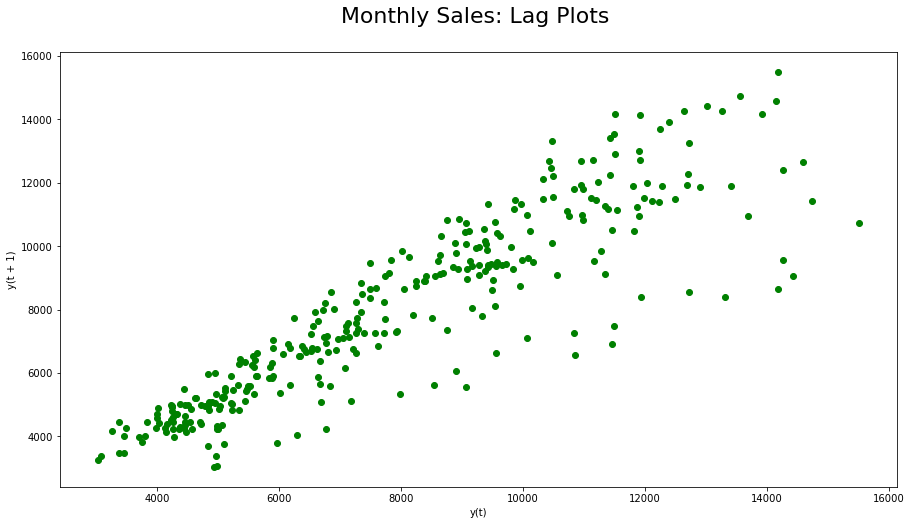

In [29]:
#Step 8.3. Revalidate non-stationarity using lag_plot, auto_correlation and Partial autcorrelation plots:
    
#Step 8.3.1 Lag plots:
         
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lag_plot(input_dataframe["Sales"], c= 'g', ax = ax);

plt.title('Monthly Sales: Lag Plots \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)

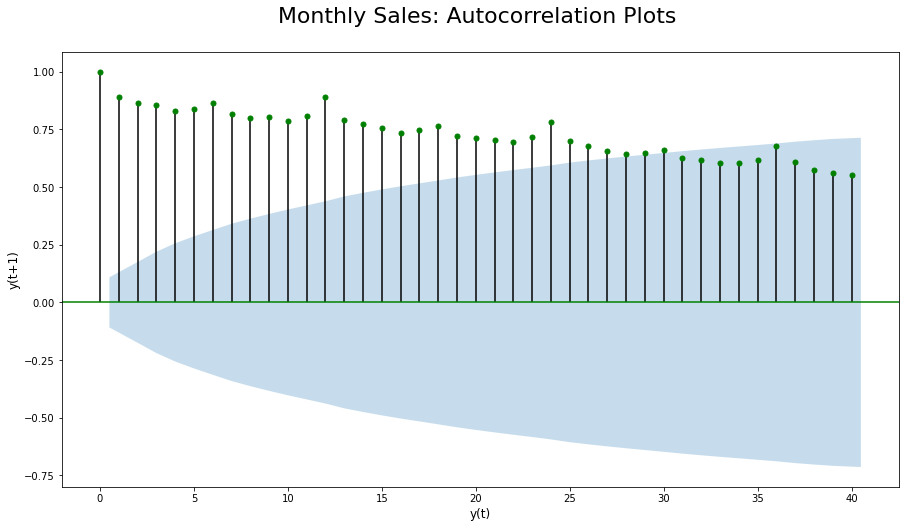

In [30]:
#Step 8.3.2 Auto Correlation (ACF) plots:

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

acf(input_dataframe["Sales"])
lags = 40
plot_acf(input_dataframe["Sales"], lags = lags, c = 'g', ax = ax);


plt.title('Monthly Sales: Autocorrelation Plots \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.ylabel('y(t+1)',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('y(t)',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)


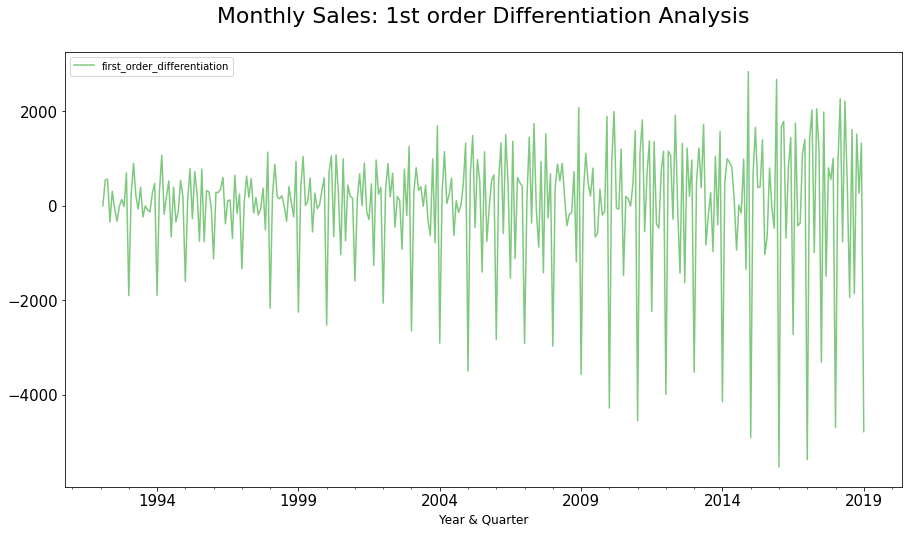

In [31]:
#Step 8.3.3 Partial Auto Correlation (PACF) plots:


input_dataframe["first_order_differentiation"] = diff(input_dataframe["Sales"], k_diff = 1)


#Plot the Graph:

ax =  input_dataframe["first_order_differentiation"].plot.line(title = 'Monthly Sales Timeseries Data : 1st order Differentiation'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)

#Configure x and y labels:

#plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Quarter',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title(' Monthly Sales: 1st order Differentiation Analysis \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)


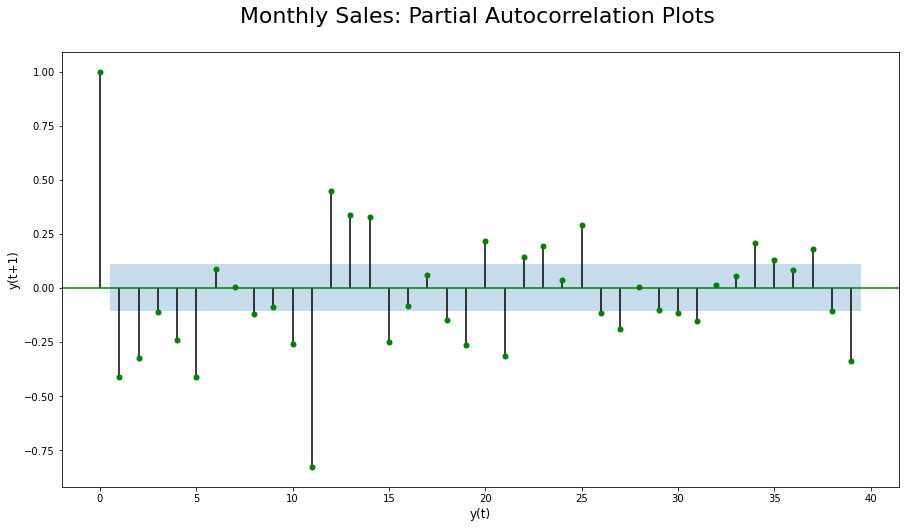

In [32]:


input_dataframe["first_order_differentiation"] = diff(input_dataframe["Sales"], k_diff = 1)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
lags = 40
plot_pacf(input_dataframe["first_order_differentiation"].dropna(), lags = np.arange(lags), c='g', ax = ax);

plt.title('Monthly Sales: Partial Autocorrelation Plots \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.ylabel('y(t+1)',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('y(t)',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)

In [33]:
#Step 9: Split the dataset into training and test set

len(input_dataframe)

training_dataframe = input_dataframe.iloc[:len(input_dataframe)-23, :1]

testing_dataframe = input_dataframe.iloc[len(input_dataframe)-23:, :1]

In [34]:
#Step 10.1: Determining ARIMA orders using auto_arima & stepwise: 
    
#Step 10.1.1: ARIMA orders using pmdarima.auto_arima:    
    
auto_arima(input_dataframe["Sales"], seasonal = True, m=12, error_action = "ignore").summary()


C:\Users\srees\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\srees\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\srees\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\srees\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\srees\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Ma

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  325
Model:             SARIMAX(3, 1, 5)x(2, 1, [1, 2], 12)   Log Likelihood               -2207.685
Date:                                 Sun, 27 Sep 2020   AIC                           4441.369
Time:                                         05:23:36   BIC                           4490.028
Sample:                                              0   HQIC                          4460.817
                                                 - 325                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0572      0.156    -13.221      0.000      -2.362      -1.752
ar.L2         -2.0364      0.179    -11.352      0.000      -2.388      -1.685
ar.L3         -0.8997      0.153     -5.878      0.000      -1.200      -0.600
ma.L1          1.1846      0.168      7.039      0.000       0.855       1.514
ma.L2          0.3509      0.143      2.449      0.014       0.070       0.632
ma.L3         -0.5465      0.123     -4.460      0.000      -0.787      -0.306
ma.L4         -0.4796      0.156     -3.069      0.002      -0.786      -0.173
ma.L5          0.1417      0.088      1.604      0.109      -0.031       0.315
ar.S.L12       0.8841      0.212      4.166      0.000       0.468       1.300
ar.S.L24      -0.6301      0.129     -4.870      0.000      -0.884      -0.377
ma.S.L12      -1.2200      0.219     -5.580      0.000      -1.649      -0.792
ma.S.L24       0.6696      0.198      3.374      0.001       0.281       1.058
sigma2      1.041e+05   1.11e+04      9.386      0.000    8.23e+04    1.26e+05
===================================================================================
Ljung-Box (Q):                       87.06   Jarque-Bera (JB):                20.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.96   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
#Stepwise 10.1.2: Revalidating ARIMA orders using stepwise auto_arima:
    
stepwise_fit = auto_arima(input_dataframe["Sales"], start_p = 0
                          , start_q = 0,max_p =3, max_q = 5
                          , m=12, seasonal = True, d=None, trace = True,
                          error_action ='ignore', suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4840.219, Time=0.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4868.181, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4731.674, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4629.449, Time=0.89 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4628.421, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4630.038, Time=0.66 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4598.228, Time=0.89 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4532.803, Time=2.90 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4594.529, Time=1.58 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=5.92 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4569.773, Time=3.69 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=4712.278, Time=2.36 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=4527.615, Time=4.03 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4572.714, Time=0.98 sec
 ARIMA(1,1,1)(2,1,0)[12]

In [36]:
#Step 10.2: Fit SARIMA Model:

fitted_SARIMA_model = SARIMAX(training_dataframe["Sales"], order =(3,1,5), seasonal_order = (2,1,1,12))
results = fitted_SARIMA_model.fit()
results.summary()

C:\Users\srees\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                  302
Model:             SARIMAX(3, 1, 5)x(2, 1, [1], 12)   Log Likelihood               -2040.144
Date:                              Sun, 27 Sep 2020   AIC                           4104.289
Time:                                      05:35:21   BIC                           4148.286
Sample:                                  01-01-1992   HQIC                          4121.918
                                       - 02-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1056      0.228     -9.221      0.000      -2.553      -1.658
ar.L2         -2.0942      0.264     -7.938      0.000      -2.611      -1.577
ar.L3         -0.9467      0.227     -4.162      0.000      -1.393      -0.501
ma.L1          1.1410      0.229      4.992      0.000       0.693       1.589
ma.L2          0.3165      0.142      2.234      0.025       0.039       0.594
ma.L3         -0.5591      0.118     -4.724      0.000      -0.791      -0.327
ma.L4         -0.4889      0.187     -2.613      0.009      -0.856      -0.122
ma.L5          0.1776      0.090      1.968      0.049       0.001       0.355
ar.S.L12       0.1873      0.266      0.705      0.481      -0.334       0.708
ar.S.L24      -0.0903      0.132     -0.684      0.494      -0.349       0.168
ma.S.L12      -0.5353      0.280     -1.914      0.056      -1.083       0.013
sigma2      9.828e+04   1.04e+04      9.448      0.000    7.79e+04    1.19e+05
===================================================================================
Ljung-Box (Q):                      119.20   Jarque-Bera (JB):                20.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.02   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
#Step 11: Evaluate Model Performance:
#Step 11.1: Evaluation SARIMA Model:

start = len(training_dataframe)
end = len(training_dataframe) + len(testing_dataframe) -1
test_SARIMA_predictions = results.predict(start = start, end = end).rename('SARIMA-Predicted Sales')


In [87]:
#Evaluating SARIMA Model - Root Mean Squared Error
np.sqrt(mean_squared_error(testing_dataframe, test_SARIMA_predictions))


562.176565188264

In [88]:
#Build variance: Inbound and Outbound values for predictions

test_SARIMA_predictions = pd.DataFrame(test_SARIMA_predictions)
test_SARIMA_predictions["SARIMA-Predicted Sales"] = test_SARIMA_predictions["SARIMA-Predicted Sales"].round(decimals =0)
test_SARIMA_predictions["Predicted Inbound Variance"] = (test_SARIMA_predictions["SARIMA-Predicted Sales"]-562.176565188264).round(decimals =0)
test_SARIMA_predictions["Predicted Outbound Variance"]= (test_SARIMA_predictions["SARIMA-Predicted Sales"]+562.176565188264).round(decimals = 0)
test_SARIMA_predictions = test_SARIMA_predictions.join(testing_dataframe)

test_SARIMA_predictions

,SARIMA-Predicted Sales,Predicted Inbound Variance,Predicted Outbound Variance,Sales
2017-03-01,12152.0,11590.0,12714.0,12481
2017-04-01,11605.0,11043.0,12167.0,11491
2017-05-01,13220.0,12658.0,13782.0,13545
2017-06-01,13504.0,12942.0,14066.0,14730
2017-07-01,11546.0,10984.0,12108.0,11416
2017-08-01,13306.0,12744.0,13868.0,13402
2017-09-01,12134.0,11572.0,12696.0,11907
2017-10-01,12474.0,11912.0,13036.0,12711
2017-11-01,13391.0,12829.0,13953.0,13261
2017-12-01,14246.0,13684.0,14808.0,14265


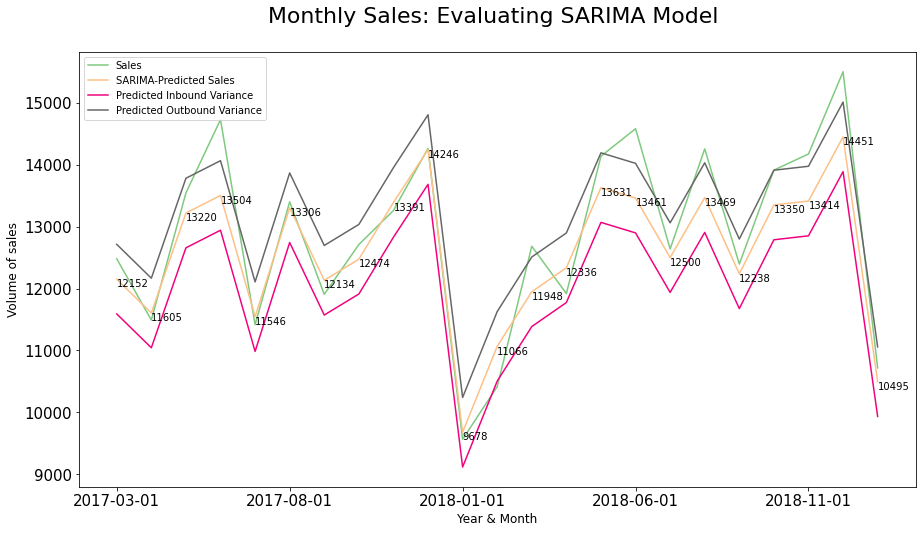

In [90]:
#Compare predictions to expected values of the test set

test_SARIMA_predictions = test_SARIMA_predictions.reset_index()

print(test_SARIMA_predictions.columns)

type(test_SARIMA_predictions["index"])

test_SARIMA_predictions["Month"] = test_SARIMA_predictions["index"].rename("Month")


test_SARIMA_predictions["Month"] = test_SARIMA_predictions["Month"] .dt.strftime('%Y-%m-%d')


test_SARIMA_predictions.set_index("Month", inplace=True)

test_SARIMA_predictions[["Sales", "SARIMA-Predicted Sales",'Predicted Inbound Variance',
       'Predicted Outbound Variance']] = test_SARIMA_predictions[["Sales", "SARIMA-Predicted Sales",'Predicted Inbound Variance',
       'Predicted Outbound Variance']] .astype(int)


#Plot the Graph:

ax = test_SARIMA_predictions[["Sales", "SARIMA-Predicted Sales","Predicted Inbound Variance","Predicted Outbound Variance"]].plot.line(
                             title = 'Monthly Sales: Evaluating SARIMA Model', legend =True, table = False, grid = False
                            ,  subplots = False,  figsize =(15,8)
                            , colormap = 'Accent', fontsize = 15
                            ,linestyle='-', stacked=False)




x=  pd.Series (range (0, len(test_SARIMA_predictions)  , 1))

for i in x:
              ax.annotate(test_SARIMA_predictions["SARIMA-Predicted Sales"][i],
                          xy=(i,test_SARIMA_predictions["SARIMA-Predicted Sales"][i]), 
                          xycoords='data',
                          xytext=(i,test_SARIMA_predictions["SARIMA-Predicted Sales"][i]+5 ), 
                          textcoords='data',
                          #arrowprops=dict(arrowstyle="->",
                            #connectionstyle="angle3",   facecolor='black'),
                          #horizontalalignment='left', 
                          verticalalignment='top') 

        
#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Month',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Monthly Sales: Evaluating SARIMA Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)

In [192]:
# Step 12: Retrain the forecasting model on the full dataset -- SARIMA Model
        
#Step 12.1:  Fit the chosen forecasting model on full dataset

final_model = SARIMAX(input_dataframe["Sales"], order = (3,1,5), seasonal_order = (2,1,1,12))

SARIMAfit = final_model.fit()


C:\Users\srees\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [193]:
#Step 12.2: Obtain Predicted vales for the full dataset

forecast_SARIMA_predictions = SARIMAfit.predict(start = len(input_dataframe), end = len(input_dataframe)+23, dynamic = False, typ = 'levels').rename ('Forecast')
 

In [194]:
#Step 12.3: Build variance: Inbound and Outbound values (with inbound/outbound variances)

forecast_SARIMA_predictions = pd.DataFrame(forecast_SARIMA_predictions)
forecast_SARIMA_predictions = forecast_SARIMA_predictions.rename(columns = {'Forecast': "SARIMA - Forecasted Sales"})
forecast_SARIMA_predictions["Minimum Sales"] = (forecast_SARIMA_predictions ["SARIMA - Forecasted Sales"] -546.9704996461452).round(decimals = 0)
forecast_SARIMA_predictions["Maximum Sales"] = (forecast_SARIMA_predictions ["SARIMA - Forecasted Sales"] +546.9704996461452).round(decimals = 0)
forecast_SARIMA_predictions["SARIMA - Forecasted Sales"] = forecast_SARIMA_predictions["SARIMA - Forecasted Sales"].round(decimals = 0)


In [195]:
#Step 12.4: Forecast Future Datapoints with upper bound and inner bound variances (as a list)

forecast_SARIMA_predictions

,SARIMA - Forecasted Sales,Minimum Sales,Maximum Sales
2019-02-01,11564.0,11017.0,12111.0
2019-03-01,13369.0,12822.0,13916.0
2019-04-01,13396.0,12849.0,13943.0
2019-05-01,14747.0,14201.0,15294.0
2019-06-01,15279.0,14732.0,15826.0
2019-07-01,13924.0,13377.0,14470.0
2019-08-01,14712.0,14165.0,15259.0
2019-09-01,13468.0,12921.0,14015.0
2019-10-01,14987.0,14440.0,15534.0
2019-11-01,14643.0,14096.0,15190.0


Index(['index', 'SARIMA - Forecasted Sales', 'Minimum Sales', 'Maximum Sales'], dtype='object')


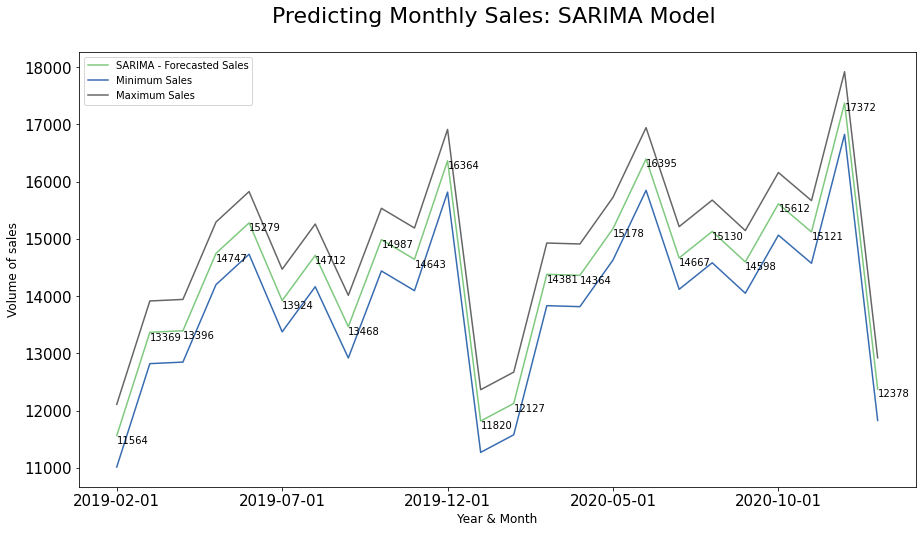

In [196]:
#Step 12.5.1: Plot predictions against known values (of the full dataset)

forecast_SARIMA_predictions1 = forecast_SARIMA_predictions

forecast_SARIMA_predictions1 = forecast_SARIMA_predictions1.reset_index()

print(forecast_SARIMA_predictions1.columns)

type(forecast_SARIMA_predictions1["index"])

forecast_SARIMA_predictions1["Month"] = forecast_SARIMA_predictions1["index"].rename("Month")


forecast_SARIMA_predictions1["Month"] = forecast_SARIMA_predictions1["Month"] .dt.strftime('%Y-%m-%d')


forecast_SARIMA_predictions1 = forecast_SARIMA_predictions1.drop(['index'], axis=1)


forecast_SARIMA_predictions1.set_index("Month", inplace=True)


forecast_SARIMA_predictions1[["SARIMA - Forecasted Sales",'Minimum Sales','Maximum Sales']] = forecast_SARIMA_predictions[["SARIMA - Forecasted Sales",'Minimum Sales','Maximum Sales']] .astype(int)


#Plot the Graph:

ax = forecast_SARIMA_predictions1[["SARIMA - Forecasted Sales",'Minimum Sales','Maximum Sales']].plot.line(
                             title = 'Predicting Monthly Sales: SARIMA Model', legend =True, table = False, grid = False
                            ,  subplots = False,  figsize =(15,8)
                            , colormap = 'Accent', fontsize = 15
                            ,linestyle='-', stacked=False)




x=  pd.Series (range (0, len(forecast_SARIMA_predictions1)  , 1))

for i in x:
              ax.annotate(forecast_SARIMA_predictions1["SARIMA - Forecasted Sales"][i],
                          xy=(i,forecast_SARIMA_predictions1["SARIMA - Forecasted Sales"][i]), 
                          xycoords='data',
                          xytext=(i,forecast_SARIMA_predictions1["SARIMA - Forecasted Sales"][i]+5 ), 
                          textcoords='data',
                          #arrowprops=dict(arrowstyle="-",
                                          #facecolor='black'),
                          #horizontalalignment='left', 
                          verticalalignment='top') 

        
#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Month',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Predicting Monthly Sales: SARIMA Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)

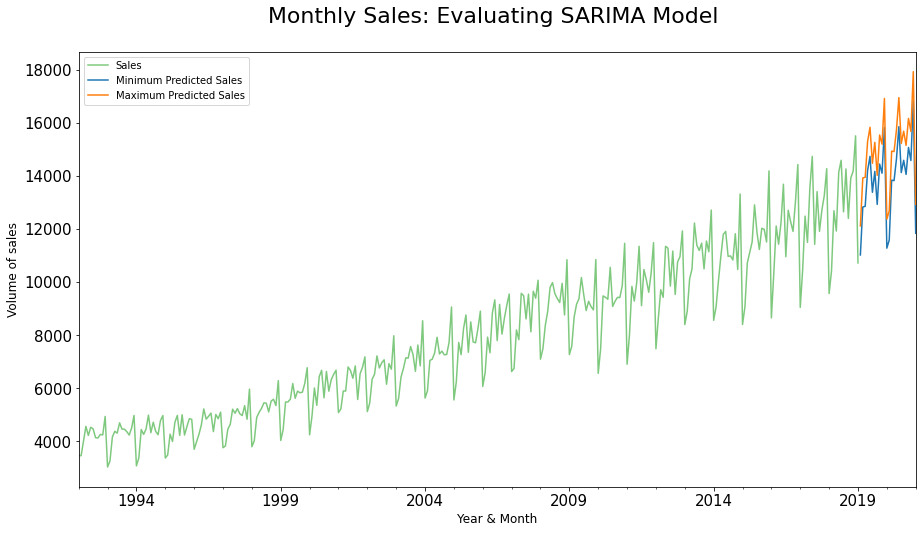

In [198]:
#Step 12.5.2: Plot predictions against known values (of the full dataset)

#Plot the Graph:

input_dataframe["Sales"].plot.line(title = 'Monthly Sales: Evaluating SARIMA Model'
                                         , legend =True, table = False, grid = False
                                         ,  subplots = False,  figsize =(15,8)
                                         , colormap = 'Accent', fontsize = 15
                                         ,linestyle='-', stacked=False)
#forecast_SARIMA_predictions["SARIMA Forecast"].plot(legend = True, label = "SARIMA Forecast")
forecast_SARIMA_predictions["Minimum Sales"].plot(legend = True, label = "Minimum Predicted Sales")
forecast_SARIMA_predictions["Maximum Sales"].plot(legend = True, label = "Maximum Predicted Sales")


#Configure x and y labels:

plt.ylabel('Volume of sales',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Year & Month',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

#Set up title, legends and theme:

plt.title('Monthly Sales: Evaluating SARIMA Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#plt.style.use(['classic'])
ax.autoscale(enable=True, axis='x', tight=False)
